In [1]:
%matplotlib inline


# TC Dataset Analysis

This sample script illustrates how to create climatological analyses using HURDAT2 and IBTrACS.



In [8]:
import tropycal.tracks as tracks
import datetime as dt

HURTDAT2 Dataset
----------------
Let's start with the HURDAT2 dataset by loading it into memory. By default, this reads in the HURDAT dataset from the National Hurricane Center (NHC) website, unless you specify a local file path using either ``atlantic_url`` for the North Atlantic basin on ``pacific_url`` for the East & Central Pacific basin.

HURDAT data is not available for the most recent hurricane seasons. To include the latest data up through today, the "include_btk" flag would need to be set to True, which reads in preliminary best track data from the NHC website.

Let's create an instance of a TrackDataset object, which will store the North Atlantic HURDAT2 dataset in memory. Once we have this we can use its methods for various types of analyses.



In [3]:
hurdat_atl = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (3.76 seconds)


Retrieving storms and seasons
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

A TrackDataset object can be used to retrieve individual storms and seasons, using the following functionality:



In [4]:
#Retrieve Hurricane Michael from 2018
storm = hurdat_atl.get_storm(('michael',2018))
    
#Retrieve the 2017 Atlantic hurricane season
season = hurdat_atl.get_season(2017)

#Printing the Storm object lists relevant data:
print(storm)

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      140 knots
    Minimum Pressure:  919 hPa
    Start Date:        0600 UTC 07 October 2018
    End Date:          1800 UTC 11 October 2018

Variables:
    date        (datetime) [2018-10-06 18:00:00 .... 2018-10-15 18:00:00]
    extra_obs   (int64) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [LO .... EX]
    lat         (float64) [17.8 .... 41.2]
    lon         (float64) [-86.6 .... -10.0]
    vmax        (int64) [25 .... 35]
    mslp        (int64) [1006 .... 1001]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL142018
    operational_id:  AL142018
    name:            MICHAEL
    year:            2018
    season:          2018
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             12.5
    realtime:        False
    invest:          False


If you remember the name of a storm but not the year, there is functionality to search for a list of years containing a storm of the requested name:



In [5]:
print(hurdat_atl.search_name('Michael'))

[2000, 2012, 2018]


The previous example for a Storm object illustrated how to retrieve a single storm and make a plot of its observed track. This can also be done from a TrackDataset object, using the ``plot_storm()`` method.

Note that you can pass various arguments to the plot function, such as customizing the map and track aspects. The only cartopy projection currently offered is PlateCarree. Read through the documentation for more customization options.



/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<GeoAxesSubplot:title={'left':'Hurricane MICHAEL','right':'07 Oct 2018 – 11 Oct 2018\n140 kt • 919 hPa • 12.5 ACE'}>

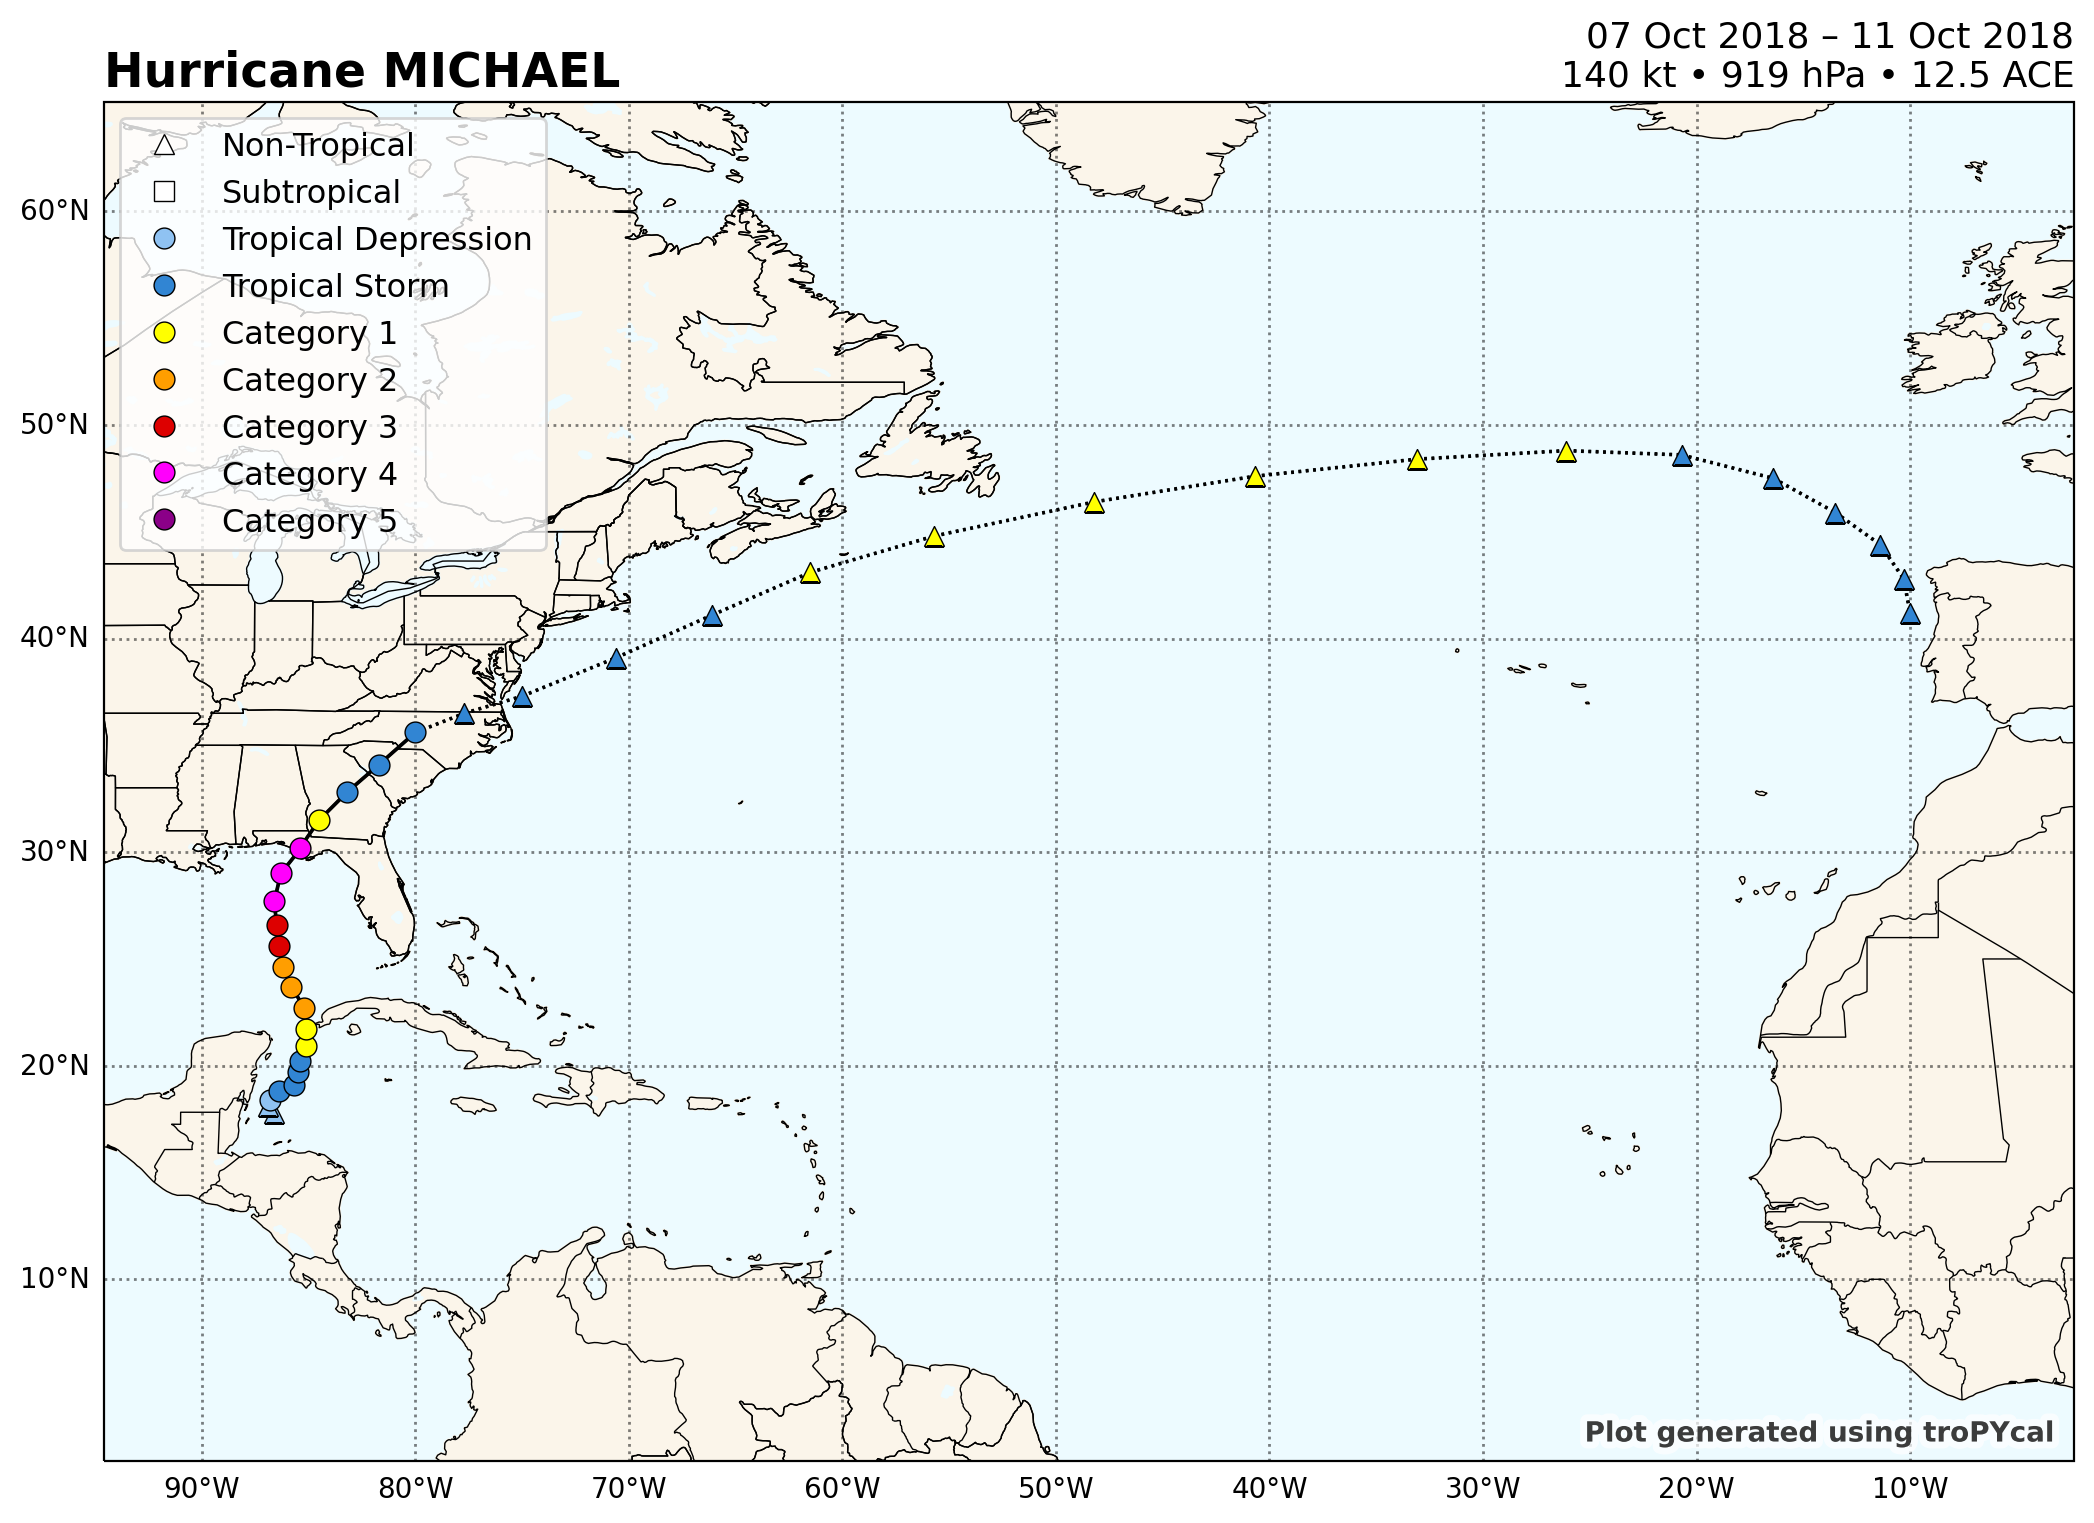

In [6]:
hurdat_atl.plot_storm(('michael',2018))

Climatological analyses
~~~~~~~~~~~~~~~~~~~~~~~

A TrackDataset object can also be used to perform various climatological analyses. We'll start off with doing simple Accumulated Cyclone Energy (ACE) analyses.

Let's look at the cumulative year-to-date accumulated cyclone energy, with 2018 highlighted and compared against 2017:



In [ ]:
hurdat_atl.ace_climo(plot_year=2018,compare_years=2017)

We can use the same function to perform a rolling sum, rather than a year-to-date sum. This highlights particularly active periods of tropical cyclone activity. We'll use the same function as before, but with a ``rolling_sum=30`` argument provided:



In [ ]:
hurdat_atl.ace_climo(rolling_sum=30,plot_year=2018,compare_years=2017)

Plot cumulative hurricane days for all categories, with 2018 highlighted:



In [ ]:
hurdat_atl.hurricane_days_climo(plot_year=2018)

Another climatological analysis available is a climatological correlation between maximum sustained wind and minimum mean sea level pressure (MSLP). While both variables are generally well correlated, factors such as background MSLP and MSLP gradient can affect this relationship.

This function plots the climatological correlation and distribution of wind-MSLP relationship, and can also plot individual storms for comparison against the climatology. We'll look at Hurricane Sandy (2012), which started out with a fairly typical wind-MSLP relationship, but towards the end of its life cycle ended up with an anomalously low MSLP given its sustained wind speed as it substantially grew in size.



In [ ]:
hurdat_atl.wind_pres_relationship(storm=('sandy',2012))

Gridded Analyses
----------------

Tropycal also offers the capability of gridding tropical cyclone data into a structured latitude / longitude grid. This is done via the ``TrackDataset.gridded_stats()`` method. This method accepts multiple input arguments for various types of analyses. This example will show some of these capabilities.

Let's construct a 1 degree grid and plot the maximum sustained wind recorded at each gridpoint:



maximum wind
--> Getting filtered storm tracks
--> Grouping by lat/lon/storm


/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/tropycal/tracks/tools.py:118: RuntimeWarning: All-NaN slice encountered
  return thresh, lambda x: np.nanmax(x)
/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/tropycal/tracks/tools.py:118: RuntimeWarning: All-NaN axis encountered
  return thresh, lambda x: np.nanmax(x)
/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


--> Generating plot


ValueError: Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.

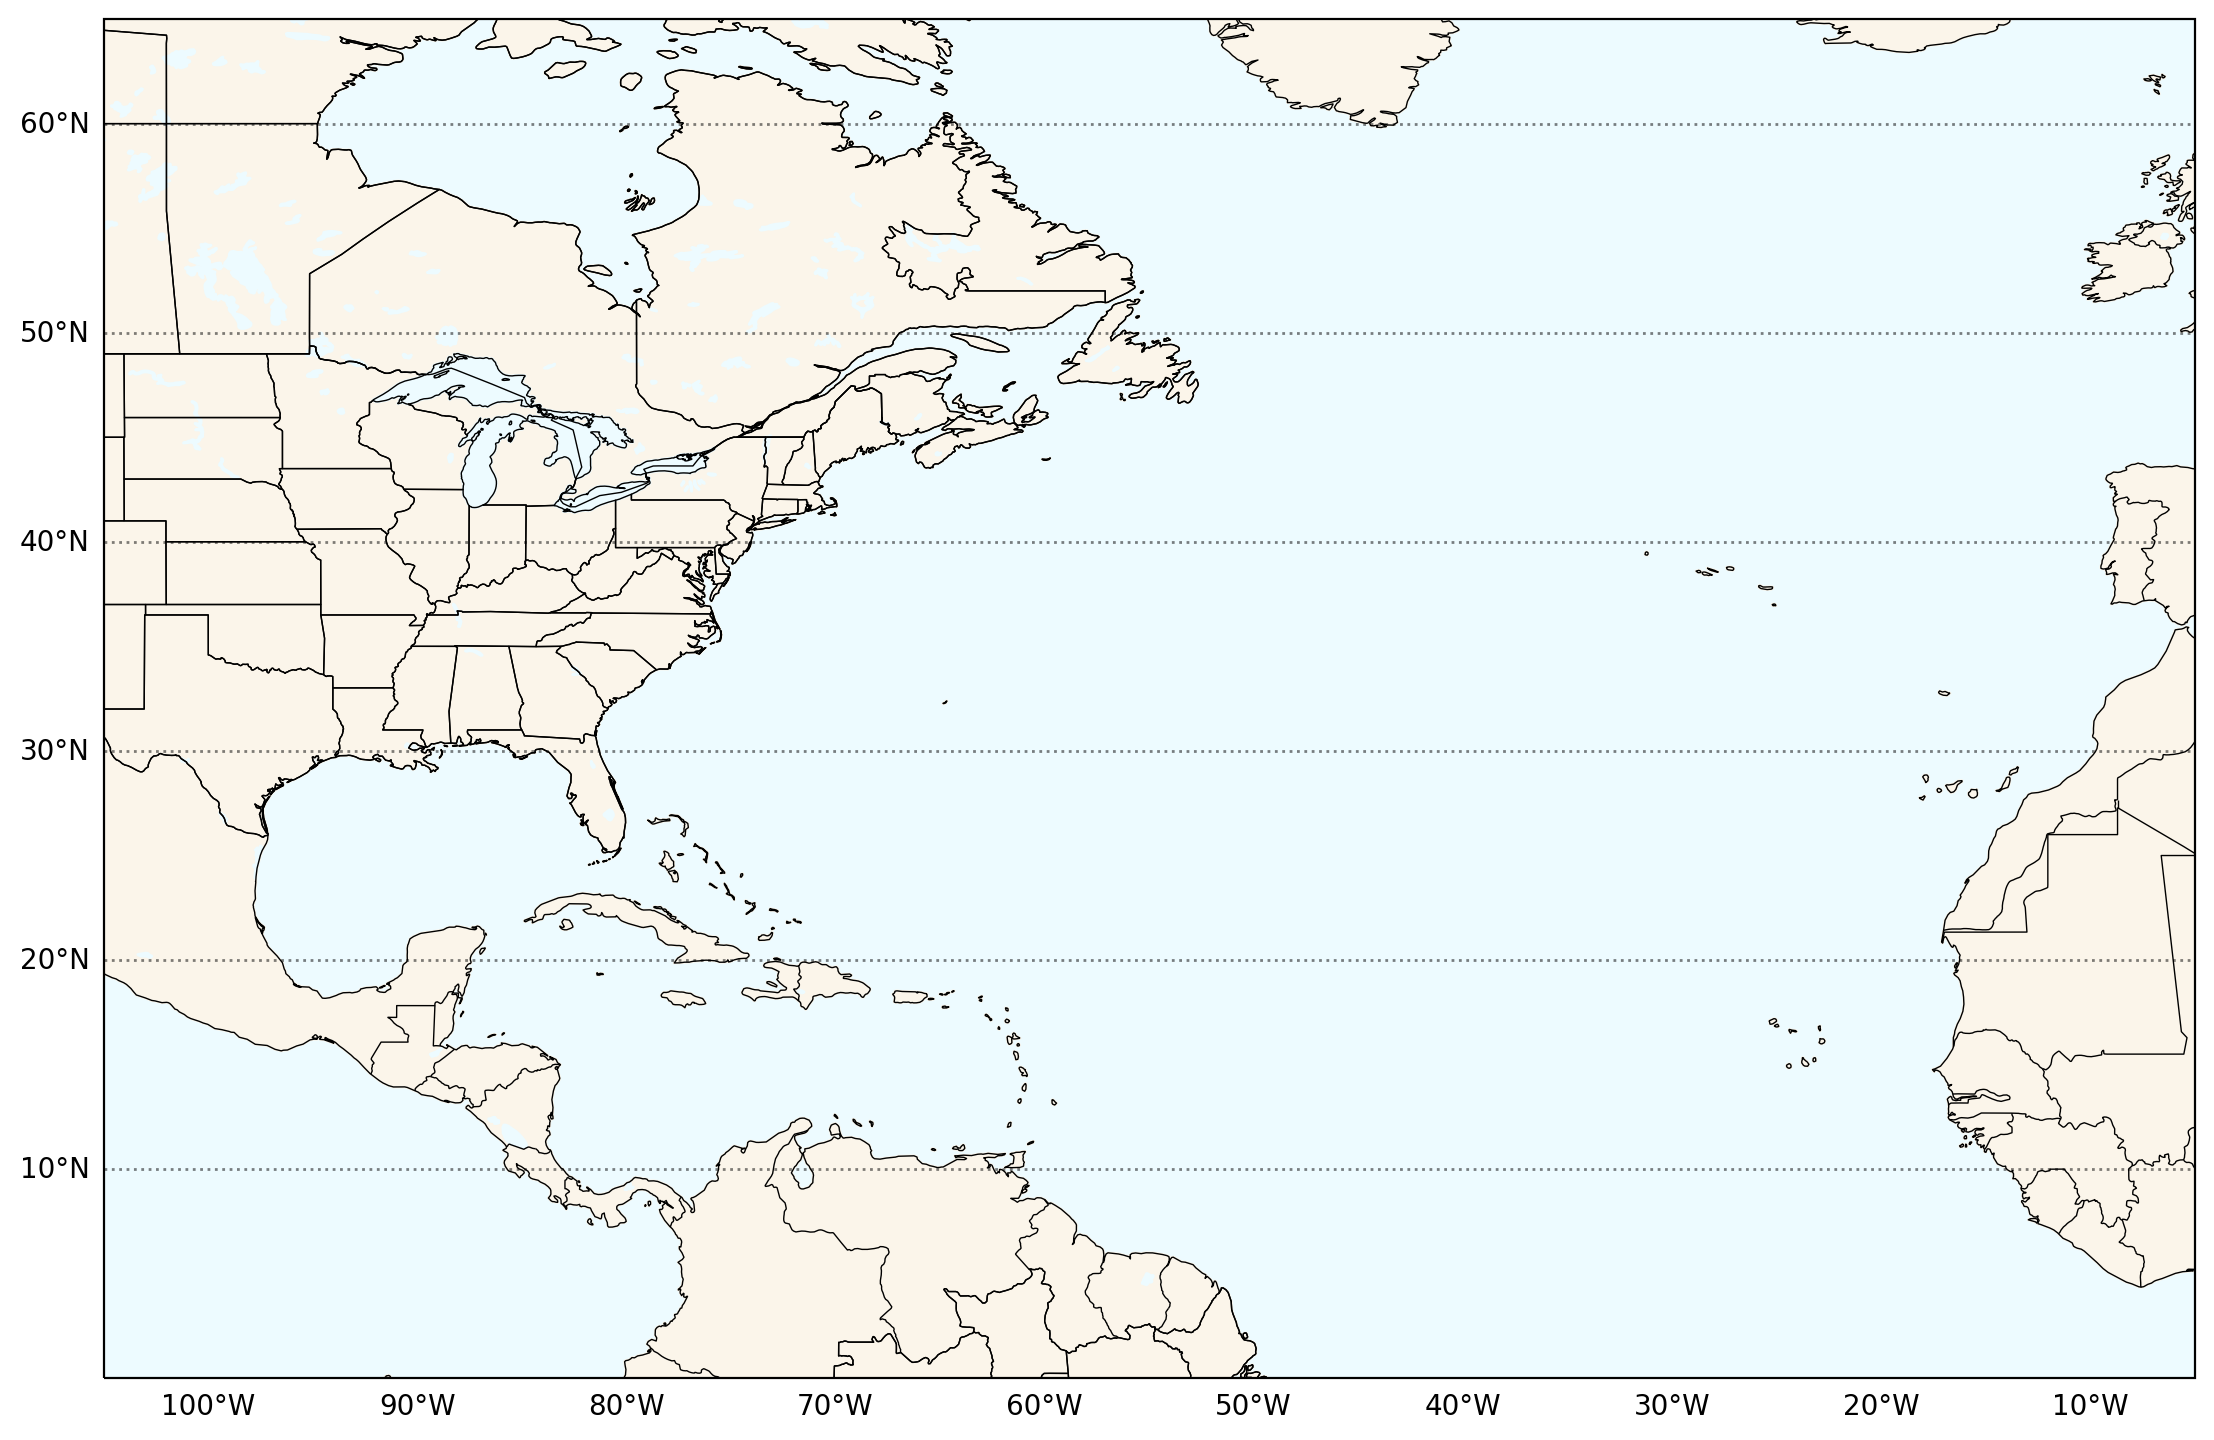

In [9]:
hurdat_atl.gridded_stats(request="maximum wind")

# Let's look at the average change in sustained wind speed over a 24-hour period. By default, the value plotted is for the midpoint of the 24-hour period (so 12 hours preceding and following). We'll use the "prop" keyword argument to set the colormap to "bwr" and set the contour level range:

hurdat_atl.gridded_stats(request="average wind change in 24 hours",prop={'cmap':'bwr','clevs':[-80,80]})

IBTrACS Dataset
---------------

We can also read in IBTrACS data and use it the same way as we would use HURDAT2 data. There are caveats to using IBTrACS data, however, which are described more in depth in the :doc:`../data` page. We'll retrieve the global IBTrACS dataset, using the Joint Typhoon Warning Center (JTWC) data, modified with the Neumann reanalysis for southern hemisphere storms, and including a special reanalysis for Cyclone Catarina (2004) in Brazil.

<div class="alert alert-danger"><h4>Warning</h4><p>By default, IBTrACS data is read in from an online source. If you're reading in the global IBTrACS dataset, this could be quite slow. For global IBTrACS, it is recommended to have the CSV file saved locally (`link to data`_), then set the flag ``ibtracs_url="local_path"``.</p></div>




In [ ]:
ibtracs = tracks.TrackDataset(basin='all',source='ibtracs',ibtracs_mode='jtwc_neumann',catarina=True)

In its current form, tropycal is not configured to support all types of analyses for global IBTrACS, particularly near the dateline. Future updates will work to improve this functionality.

Let's make a plot of the maximum sustained wind of TCs globally:



In [ ]:
ibtracs.gridded_stats(request="maximum wind")

Make a plot of the total number of storms per 1 degree gridbox worldwide:



In [ ]:
ibtracs.gridded_stats(request="number of storms",prop={'cmap':'plasma_r'})

Make a plot of the total number of rapidly intensifying storms (>=30 kt over 24 hours) per 1 degree gridbox:



In [ ]:
ibtracs.gridded_stats(request="number of storms",thresh={'dv_min':30},prop={'cmap':'plasma_r'})